In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
vol_mm3 = 10580460.27
vol_cm3 = vol_mm3 / 1e3

density = 2.71 # g / cm3
mass = vol_cm3 * density # g

dT_4K = 290 - 4 # deg C
dT_100mK = 4 - 0.1 # deg C
c_Al = 0.89 # J/g deg C

Q_4K = mass * c_Al * dT_4K
Q_100mK = mass * c_Al * dT_100mK

P_pulse = 2 # W
P_DR = 450e-6 # W at 100 mK

t_s_4K = Q_4K/P_pulse
t_days_4K = 1.15741e-5 * t_s_4K
t_s_100mK = Q_100mK/P_DR
t_days_100mK = 1.15741e-5 * t_s_100mK
print(mass, "g")
print("Time from 290 K to 4 K", t_days_4K, "days")
print("Time from 4 K to 100 mK", t_days_100mK, "days")
print("Time from 290 K to 100 mK", t_days_4K + t_days_100mK, "days")

28673.0473317 g
Time from 290 K to 4 K 42.23642254809518 days
Time from 4 K to 100 mK 2559.783184733041 days
Time from 290 K to 100 mK 2602.019607281136 days


2559.783184733041
28673.0473317 g
602.2116384443128 days


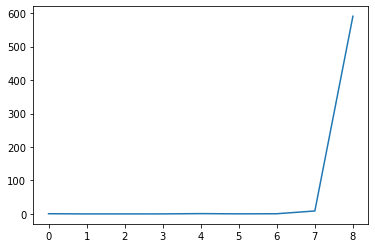

In [32]:
vol_mm3 = 10580460.27
vol_cm3 = vol_mm3 / 1e3

density = 2.71 # g / cm3
mass = vol_cm3 * density # g

 # deg C
Ts = [290, 77, 65, 54, 44, 12, 8, 4, 1, 0.1]
dTs = -np.diff(Ts)

c_Al = 0.89 # J/g deg C

Qs = mass * c_Al * dTs

print(mass * c_Al * 3.9 / 450e-6 * 1.15741e-5)

Ps = np.array([100, 75, 50, 25, 10, 5, 2, 0.1, 450e-6])

ts_s = Qs/Ps
ts_days = 1.15741e-5 * ts_s
print(mass, "g")
print(np.sum(ts_days), "days")
plt.plot(ts_days)

C:\Users\tajdy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


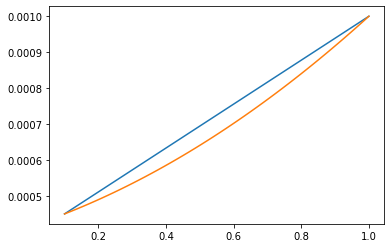

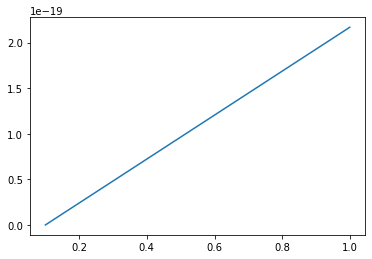

In [33]:
T = [4, 1, 0.1][1:]
P = [100e-3, 1e-3, 450e-6][1:]
p = np.polyfit(T,P,2)
x = np.linspace(T[0], T[-1])
plt.plot(T,P)
plt.plot(x, np.polyval(p, x))
plt.figure()
plt.plot(T, P - np.polyval(p, T))

In [21]:
t_days = 7
t_s = t_days / 1.15741e-5
mass = t_s * P_DR / c_Al / 1.9
print(mass, "g")

160.9458251702931 g


28673.0473317 g
0.8467537480547686 days


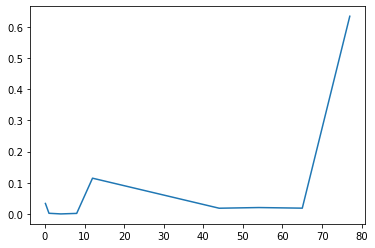

In [36]:
vol_mm3 = 10580460.27
vol_cm3 = vol_mm3 / 1e3

density = 2.71 # g / cm3
mass = vol_cm3 * density # g

 # deg C
Ts = np.array([290, 77, 65, 54, 44, 12, 8, 4, 1, 0.1])
dTs = -np.diff(Ts)
Al_Cps = np.array([0.89638016, 0.35789936, 0.28714792, 0.1416284, 0.10828192, 0.008334528, 0.000851444, 0.0002581528, 5.1254e-5])

Qs = mass * Al_Cps * dTs

#print(mass * c_Al * 3.9 / 450e-6 * 1.15741e-5)

Ps = np.array([100, 75, 50, 25, 10, 5, 2, 0.1, 450e-6])

ts_s = Qs/Ps
ts_days = 1.15741e-5 * ts_s
print(mass, "g")
print(np.sum(ts_days), "days")
plt.plot(Ts[1:],ts_days)

14336.52366585 43009.57099755


Text(0, 0.5, 'Cooldown time (hours)')

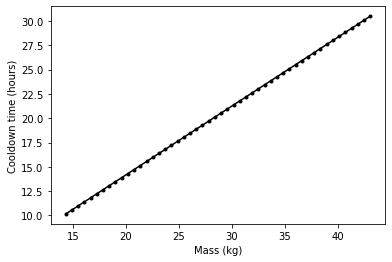

In [45]:
vols_mm3 = np.linspace(vol_mm3 - 0.5*vol_mm3,vol_mm3 + 0.5*vol_mm3)
vols_cm3 = vols_mm3 / 1e3

density = 2.71 # g / cm3
masses = vols_cm3 * density # g

print(masses[0], masses[-1])

 # deg C
Ts = np.array([290, 77, 65, 54, 44, 12, 8, 4, 1, 0.1])
dTs = -np.diff(Ts)
Al_Cps = np.array([0.89638016, 0.35789936, 0.28714792, 0.1416284, 0.10828192, 0.008334528, 0.000851444, 0.0002581528, 5.1254e-5])

Qs = masses[:,np.newaxis] * (Al_Cps * dTs).reshape(1,-1)

#print(mass * c_Al * 3.9 / 450e-6 * 1.15741e-5)

Ps = np.array([100, 75, 50, 25, 10, 5, 2, 0.1, 450e-6]).reshape(1,-1)

ts_s = Qs/Ps
ts_days = 1.15741e-5 * ts_s
plt.plot(masses*1e-3,np.sum(ts_days, axis=1)*24, 'k.-')
plt.xlabel("Mass (kg)")
plt.ylabel("Cooldown time (hours)")